In [1]:
# SGDClassifier
# 확률적 경사 하강법을 사용한 분류 모델을 만들어본다.
# fish_csv_data 파일에서 판단스 데이터 프레임을 만든다.

import pandas as pd
 
fish = pd.read_csv('data/fish.csv')

In [2]:
# 입력데이터와 타깃데이터 생성
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
# 훈련세트와 테스트 세트로 나눈다
from sklearn.model_selection import train_test_split
 
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [4]:
# 훈련세트와 테스트 세트의 특성을 표준화 처리한다.
# 훈련세트에서 학습한 통계값으로 테스트 세트도 변환한다.
 
from sklearn.preprocessing import StandardScaler
 
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [17]:
# GDClassifier 클래스로 확률적 경사 하강법 사용한다.
# 객체생성시 매개변수 2개 지정한다. loss는 손실함수의 종류를 지정한다.
# 로지스틱 손실함수 지정한다.
# max_iter는 수행할 에포크 회수를 지정한다. 10으로 지정하면 전체 훈련세트를 10회 반복
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=100, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42)

In [18]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.8


### 에포크와 과대/과소적합

In [19]:
# 확률적 경사 하강법을 사용한 모델은 에포크 회수에 따라 과소적합이나 
# 과대적합이 될 수 있다.

# 적은 에포크 횟수는 과소적합될 수 있다. 많은 에포크 횟수는 과대적합될 수있다.
import numpy as np
 
sc = SGDClassifier(loss='log', random_state=42) # 1000회 기본값
 
train_score = []
test_score = []
 
classes = np.unique(train_target)

In [20]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

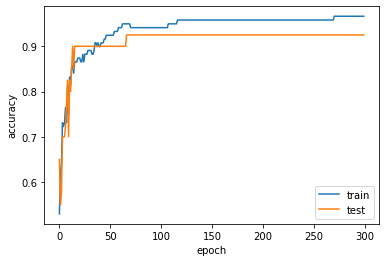

In [21]:
# 300번 에포크 동안 기록한 훈련세트와 테스트세트의 점수를 그래프로 그린다.
import matplotlib.pyplot as plt
 
plt.plot(train_score, label='train')
plt.plot(test_score, label='test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [22]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
 
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
